In [1]:
import sys
sys.path.append("../scripts/")
from gridmap import *
import math
from matplotlib.animation import PillowWriter    #アニメーション保存用

In [4]:
class Directed():
    def __init__(self, grid_map_world):
        self.world = grid_map_world
        self.grid_map = grid_map_world.grid_map
        self.flag_path_draw = 0  #経路描画のフラグ
        self.nowIndex = self.world.start_index
        self.resultPath = [self.nowIndex]    #算出した経路
        
    def draw(self, ax, elems):
        if(self.nowIndex != self.world.goal_index): #ゴールにたどり着いていなければコストを計算
            self.nowIndex = self.nextIndex(self.nowIndex)
            self.resultPath.append(self.nowIndex)
            if(self.nowIndex == self.world.goal_index):
                return
            r = patches.Rectangle(
                xy=(self.nowIndex[0]*self.world.grid_step[0], self.nowIndex[1]*self.world.grid_step[1]),
                height=self.world.grid_step[0],
                width=self.world.grid_step[1],
                color="red",
                fill=True,
                alpha=0.5
            )
            ax.add_patch(r)
                

    def nextIndex(self, index):
        neigbors = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [-1, 0], [-1, 1]]
        goal_dis = 10000
        next_index = index
        print("="*30)
        for neigbor in neigbors:
            neigbor_index = [index[0] + neigbor[0], index[1] + neigbor[1]]
            dx, dy = neigbor_index[0] - self.world.goal_index[0], neigbor_index[1] - self.world.goal_index[1]
            dis = math.sqrt(dx**2 + dy**2)
            if(goal_dis > dis):
                goal_dis = dis
                next_index = neigbor_index
        return next_index

<IPython.core.display.Javascript object>


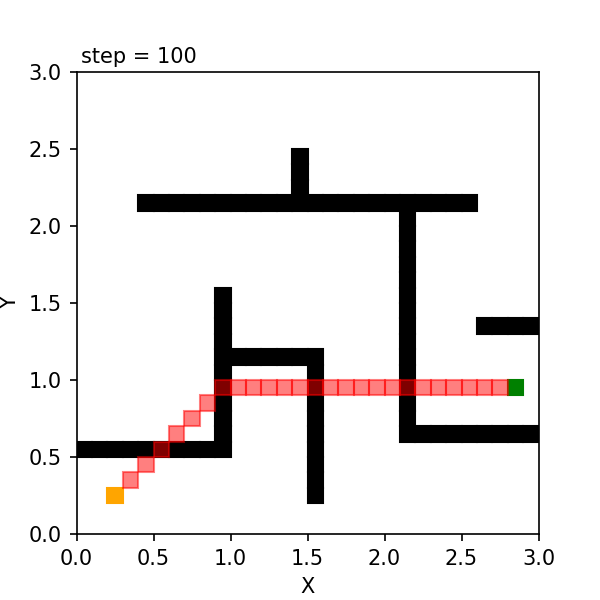

In [5]:
if __name__ == "__main__":
    time_span = 10
    time_interval = 0.1
    
    grid_step = np.array([0.1, 0.1])
    grid_num = np.array([30, 30])
    
    map_data = "../csvmap/map2.csv"
    
    world = GridMapWorld(grid_step, grid_num, time_span, time_interval, map_data, debug=False)
    world.append(Directed(world))
    
    world.draw()
    #world.ani.save('dijkstra_map1.gif', writer='pillow', fps=100)    #アニメーション保存